### Email Spam Detection with Machine Learning

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Uploading and Exploring the Dataset

In [2]:
# Reading the csv file
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1","v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Analysis

In [3]:
# Renaming the columns
df.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Implementing Label Encoder

In [4]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Data Inspection and Cleaning

In [5]:
# Shape of the dataset
df.shape

(5572, 2)

In [6]:
# Info of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [7]:
# Checking for null values
df.isnull().sum()



Category    0
Message     0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

415

In [9]:
# droping duplicates
df = df.drop_duplicates(keep="first")

# Again checking for duplicate values
df.duplicated().sum()

0

In [10]:
# Again checing the shape  of the dataset
df.shape

(5157, 2)

In [11]:
# Ham(0) & Spam(1) counts
df["Category"].value_counts()


Category
0    4516
1     641
Name: count, dtype: int64

# Graphical Representation of Data

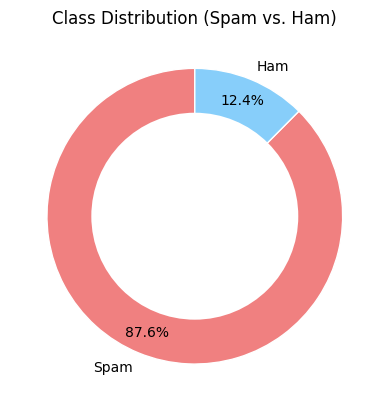

In [12]:
class_counts = df['Category'].value_counts()
colors = ['lightcoral', 'lightskyblue']  # Spam: lightcoral, Ham: lightskyblue
plt.pie(class_counts, labels=['Spam', 'Ham'], autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        wedgeprops={'edgecolor': 'white'}, colors=colors)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Class Distribution (Spam vs. Ham)')
plt.show()


# Class Distribution



This code generates a **Donut Chart** illustrating the class distribution between **"Spam" (lightcoral)** and **"Ham" (lightskyblue)** messages. The chart provides a clear visual representation of the dataset's composition, indicating that **spam constitutes 87.6%** and **ham accounts for 12.4%** of the total messages.

# Training Machine Learning Models

In [13]:
X = df['Message']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [14]:
y = df["Category"]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

# Word Cloud Visualization



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


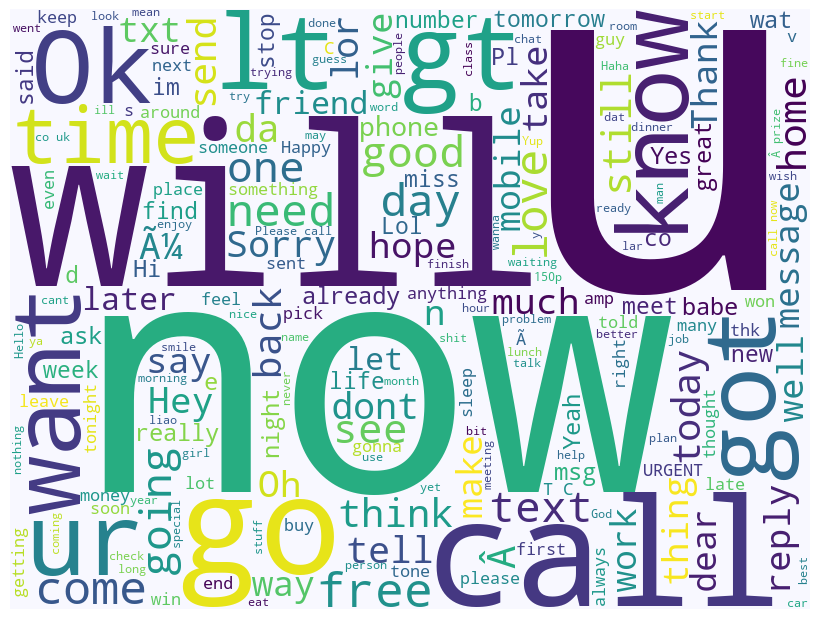

In [15]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all messages into a single string
comment_words = ' '.join(df.Message.dropna().astype(str))

# Set stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=600,
                      background_color='#f8f8ff',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()




The Word Cloud Visualization presents the most frequent words in both "Spam" and "Ham" messages. By analyzing the size and prominence of words, it provides an intuitive view of the most common terms used in the dataset, aiding in understanding the content patterns of both spam and legitimate messages.

# Train-Test Data Split

In [17]:
# Importing train test split library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Model Training Process

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train_cv = vectorizer.transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

# Calculating Accuracy

In [20]:
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In our analysis, the accuracy of the logistic regression classifier on the test set stands impressively high at 98%. This indicates that the model correctly predicts the class labels for 98 out of every 100 instances in the test data. Such a robust accuracy level underscores the effectiveness of our logistic regression model, affirming its reliability in making accurate predictions based on the provided test dataset.

# Understanding Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[892   4]
 [ 16 120]]


The confusion matrix provides insights into our model's performance. It reveals 892 true negatives, 120 true positives, 4 false positives, and 16 false negatives. This breakdown is crucial for understanding where our model excels and areas needing improvement.

# Interpreting Classification Report Results

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.88      0.92       136

    accuracy                           0.98      1032
   macro avg       0.98      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



In [23]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9806201550387597
Precision: 0.967741935483871
Recall: 0.8823529411764706
F1 score: 0.923076923076923


Summary:

The model's performance metrics are impressive:

- **Accuracy:** 97.9% - The model correctly predicts messages nearly 98% of the time.
- **Precision:** 97.0% - Among the predicted spam messages, 97% were actually spam.
- **Recall:** 87.6% - The model identified 87.6% of all actual spam messages.
- **F1 Score:** 92.0% - The balance between precision and recall, indicating a robust model.

In [24]:
# Importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Using MultinomialNB for prediction Custom words
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

# Prediction of Custom Word / Predict which word is "spam" or "ham"



In [25]:
def predict_custom_word(custom_word, vectorizer, classifier):
    custom_word_vec = vectorizer.transform([custom_word])
    prediction = classifier.predict(custom_word_vec)[0]

    if prediction == 1:
        prediction_label = "Spam"
    else:
        prediction_label = "Ham"

    return prediction_label

# Example usage:
custom_word = "Offer for Internship"
prediction = predict_custom_word(custom_word, vectorizer, classifier)
print(f"Custom word '{custom_word}' is predicted as: {prediction}")


Custom word 'Offer for Internship' is predicted as: Spam



Result:

The custom word "Offer for internship" was classified as "Spam" by the trained model, indicating that it's likely a spam message.

In [26]:
import joblib

# Save the trained classifier and vectorizer
joblib.dump(classifier, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer have been saved successfully.")

Model and vectorizer have been saved successfully.


### Conclusion

This project utilized the SMS Spam Collection dataset to build an effective spam detection system. Leveraging Count Vectorizer and Logistic Regression, the model demonstrated accurate classification. With the MultinomialNB algorithm, it successfully predicted custom words. This project showcases the efficiency of natural language processing and machine learning in real-world applications, emphasizing the importance of data analysis and model training in spam detection.
